In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [187]:
train_data=pd.read_csv('bigmart_data_train.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [188]:
test_data=pd.read_csv('bigmart_data_test.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [189]:
print(train_data.shape)
print(test_data.shape)

(8523, 12)
(5681, 11)


In [190]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [191]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [192]:
# As we see that in both data all columns are same.. but in train_data one column is more than test_data. we can merge both datasets.

In [193]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [194]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [195]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [196]:
train_data['source']='train'
test_data['source']='test'
ds=pd.concat([train_data,test_data],ignore_index=True)

In [197]:
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [198]:
ds.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [199]:
ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [200]:
ds.shape

(14204, 13)

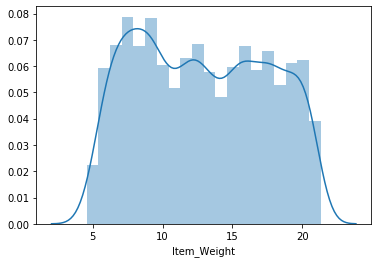

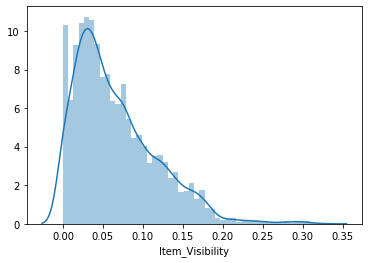

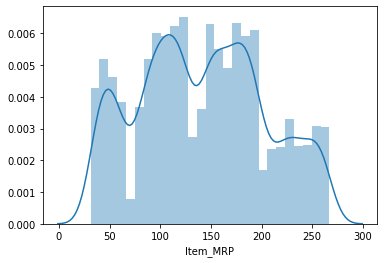

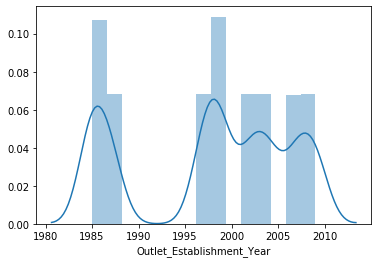

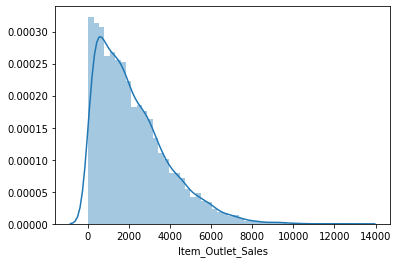

In [201]:
for i in train_data.describe().columns:
    sns.distplot(train_data[i].dropna())
    plt.show()

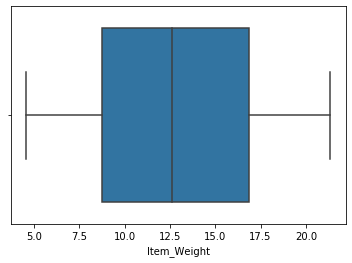

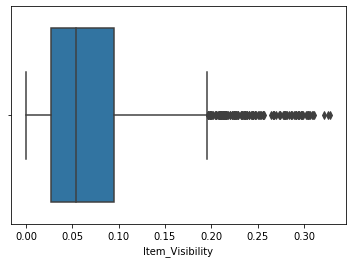

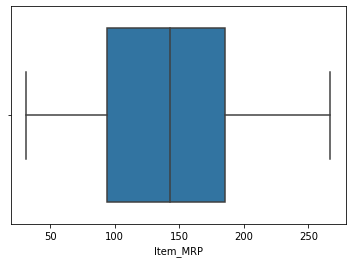

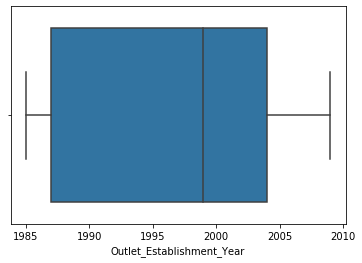

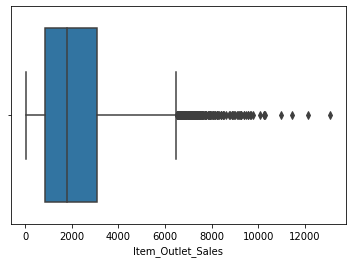

In [202]:
for i in train_data.describe().columns:
    sns.boxplot(train_data[i].dropna())
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

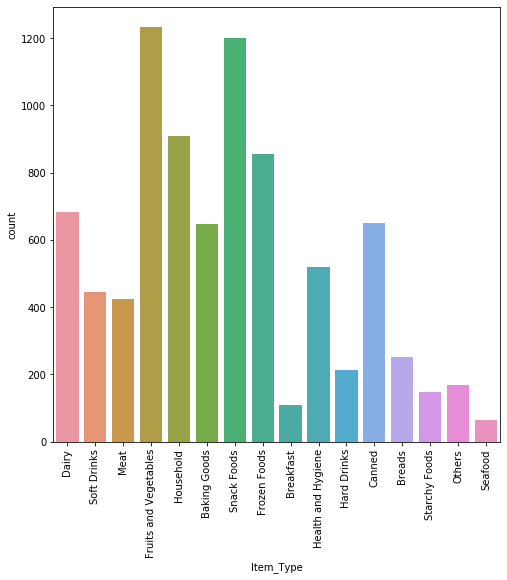

In [203]:
plt.figure(figsize=(8,8))
sns.countplot(train_data.Item_Type)
plt.xticks(rotation=90)

In [204]:
# fruits and vegetables are most saled items in mart where as seafood are least saled item.

In [205]:
train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Distribution of outlet_size

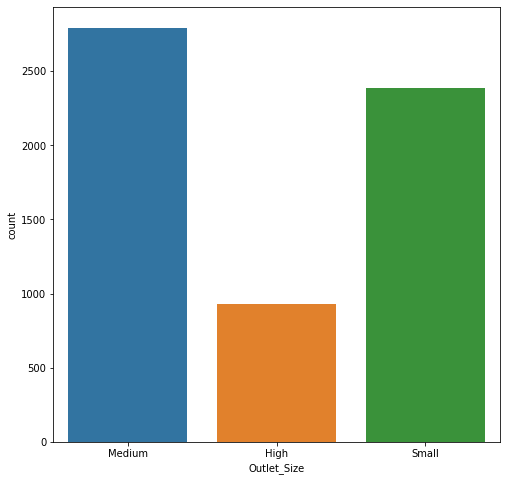

In [206]:
plt.figure(figsize=(8,8))
sns.countplot(train_data.Outlet_Size)

In [207]:
# no of medium size outlets more than high and small outlet size

In [208]:
train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type

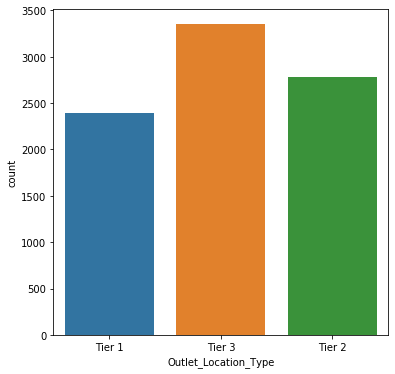

In [209]:
plt.figure(figsize=(6,6))
sns.countplot(train_data.Outlet_Location_Type)

In [210]:

train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [211]:
# tier3 >tier2> tier 1

Outlet_type

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

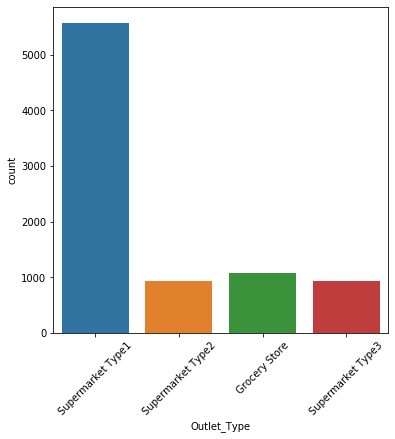

In [212]:
plt.figure(figsize=(6,6))
sns.countplot(train_data.Outlet_Type)
plt.xticks(rotation=45)

In [213]:
train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [214]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

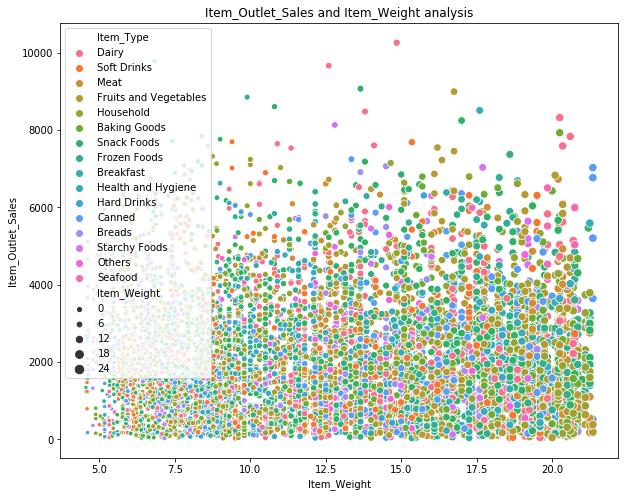

In [215]:
plt.figure(figsize=(10,8))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Outlet_Sales and Item_Weight analysis')
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=train_data)
plt.show()

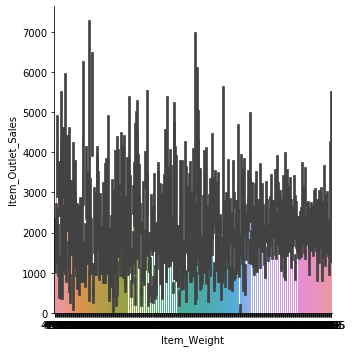

In [216]:
g=sns.catplot(x='Item_Weight',y='Item_Outlet_Sales',data=train_data,kind='bar')
plt.show()

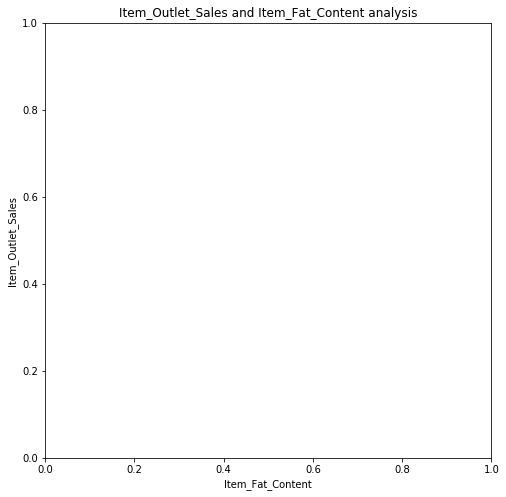

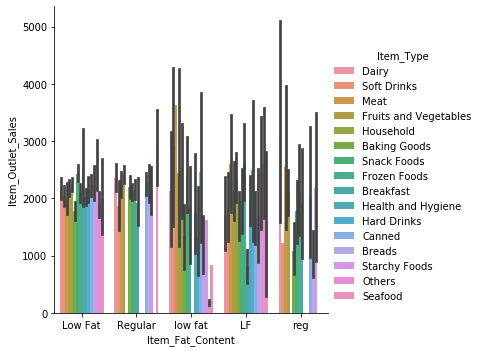

In [217]:
plt.figure(figsize=(8,8))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Outlet_Sales and Item_Fat_Content analysis")
sns.catplot(x='Item_Fat_Content',y='Item_Outlet_Sales',hue='Item_Type',data=train_data,kind="bar")

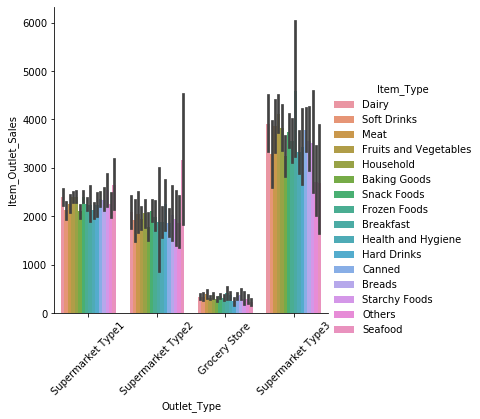

In [218]:
sns.catplot(x="Outlet_Type",y="Item_Outlet_Sales",hue="Item_Type",data=train_data,kind="bar")
plt.xticks(rotation=45)
plt.show()

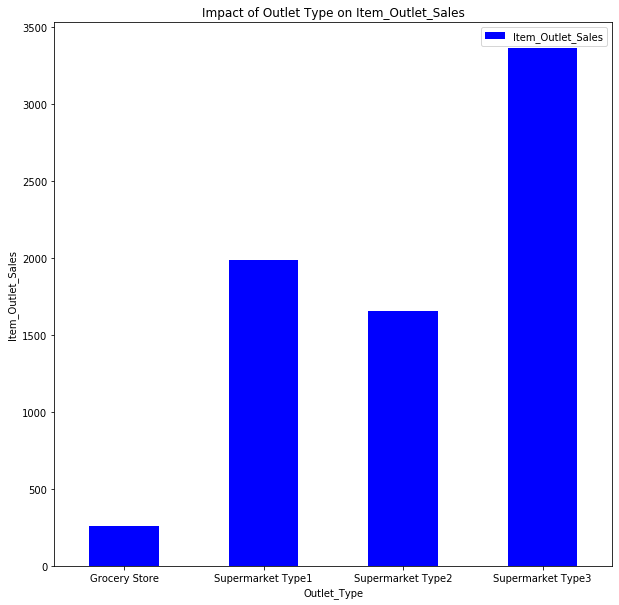

In [219]:
Outlet_Type_pivot=\
train_data.pivot_table(index="Outlet_Type",values="Item_Outlet_Sales",aggfunc=np.median)
Outlet_Type_pivot.plot(kind="bar",color="blue",figsize=(10,10))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [220]:
# Item Outlet sale is Maximum in Supermarket type 3 and least Item Outlet Sale in Grocery Store

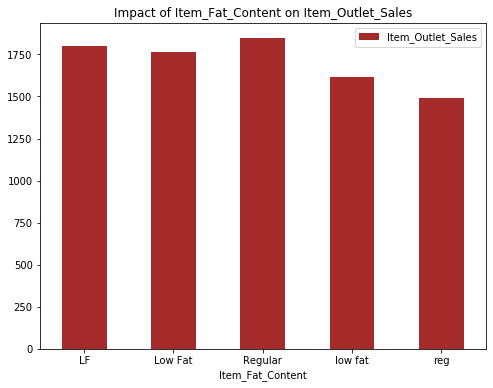

In [221]:
Item_Fat_Content_pivot=\
train_data.pivot_table(index="Item_Fat_Content",values="Item_Outlet_Sales",aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind="bar",color="brown",figsize=(8,6))
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [222]:
ds["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [223]:
train_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [224]:
ds['Item_Fat_Content']=ds['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
ds['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [225]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [226]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

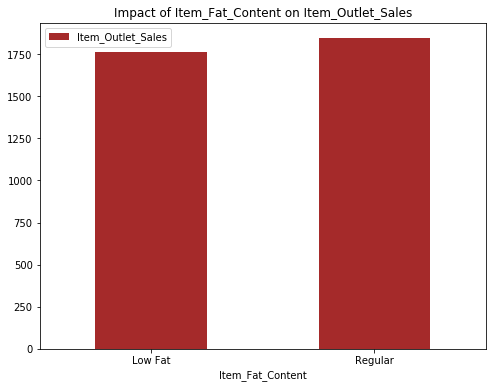

In [227]:
# Again make 
Item_Fat_Content_pivot=\
train_data.pivot_table(index="Item_Fat_Content",values="Item_Outlet_Sales",aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind="bar",color="brown",figsize=(8,6))
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)

In [228]:
# now we can say that regular items have sale more than Low Fat items.

In [229]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


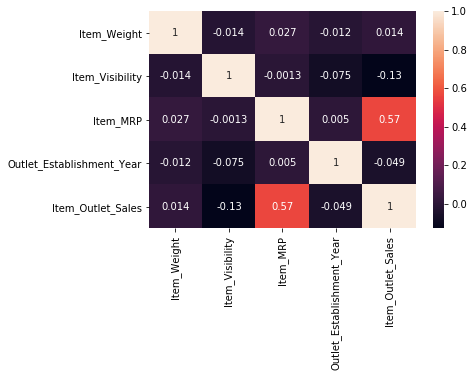

In [230]:
sns.heatmap(train_data.corr(),annot=True)

Treating with missing values

In [231]:
ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [232]:
#we found that there is three columns which have missing values

In [233]:
ds["Item_Weight"].mean()

12.792854228644991

In [234]:
ds["Item_Weight"].fillna(ds["Item_Weight"].mean(),inplace=True)

In [235]:
ds['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [236]:
ds["Outlet_Size"].fillna('Medium',inplace=True)

3.Item_Outlet_Sales

In [237]:
ds['Item_Outlet_Sales'].fillna(0,inplace=True)

In [238]:
ds.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [239]:
ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.234226,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,9.300000,0.027036,94.012000,1987.000000,0.000000
50%,12.792854,0.054021,142.247000,1999.000000,559.272000
75%,16.000000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [240]:
ds[ds['Item_Visibility']==0]['Item_Visibility'].count()

879

In [241]:
ds['Item_Visibility'].fillna(ds['Item_Visibility'].median(),inplace=True)

In [242]:
ds['Item_Visibility'].count()

14204

In [243]:
ds['Item_Visibility'].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

Outlet_Years

In [244]:
ds['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

Item Type

In [245]:
ds['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [246]:
ds['Item_Identifier'].value_counts()

FDX22    10
FDW47    10
FDT37    10
NCN53    10
NCO14    10
         ..
FDM52     7
FDX49     7
FDL50     7
DRN11     7
FDS22     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [247]:
# changing only the first two characters
ds['New_Item_Type']=ds['Item_Identifier'].apply(lambda x: x[0:2])

In [248]:
# Rename them 
ds['New_Item_Type']=ds['New_Item_Type'].map({'FD':'Food',"NC":'Non-Consumable','DR':'Drinks'})

In [249]:
ds['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [250]:
ds['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [184]:
# If a product is Non-Consumable then there is no need of fat content. so we will get rid of this:
ds.loc[ds['New_Item_Type']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [185]:
ds['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [253]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
ds['Outlet']=lb.fit_transform(ds['Outlet_Identifier'])

In [254]:
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Type,Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,9
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,9
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,1


In [255]:
varib=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for i in varib:
    ds[i]=lb.fit_transform(ds[i])

In [256]:
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Type,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,train,1,9
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,train,0,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,train,1,9
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800,train,1,0
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,train,2,1


In [257]:
ds.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
source                        object
New_Item_Type                  int32
Outlet                         int32
dtype: object

In [259]:
ds.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [260]:
train=ds.loc[ds['source']=='train']
test=ds.loc[ds['source']=='test']

In [261]:
train.drop(['source'],axis=1,inplace=True)

In [262]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [314]:
x_train=train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train=train['Item_Outlet_Sales']
x_test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

LINEAR REGRASSION

In [266]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [267]:
lreg.coef_

array([-6.12499486e-01,  5.42342491e+01, -1.39822604e+03,  1.55880729e+01,
       -3.38483972e+02, -2.21844325e+02,  8.80001217e+02, -1.63247988e+01,
        5.98552570e+01])

In [269]:
lreg.score(x_train,y_train)*100

51.04006968486071

In [270]:
pred=lreg.predict(x_test)
pred

array([2107.97847495, 1165.63756272, 2191.4945084 , ..., 1834.07730033,
       3199.47349882, 1254.20544204])

DECISION TREE REGRESSOR

In [272]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [276]:
tree.score(x_train,y_train)*100

100.0

In [277]:
tree_pred=tree.predict(x_test)

In [278]:
tree_pred

array([ 759.6778, 1278.336 ,  264.3226, ...,  579.246 , 5366.348 ,
        864.2084])

RANDOM FOREST REGRESSOR

In [280]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,random_state=45)
rf.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=45, verbose=0, warm_start=False)

In [282]:
rf.score(x_train,y_train)*100

93.86947099048429

In [283]:
rf_pred=rf.predict(x_test)

In [284]:
rf_pred

array([1700.503135, 1171.052317,  846.950864, ..., 1809.221617,
       4443.905403, 1445.578302])

In [285]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor


In [290]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [292]:
ada.score(x_train,y_train)*100
   

49.39279086760936

In [293]:
ada_pred=ada.predict(x_test)
    

In [294]:
ada_pred

array([1849.26715767, 1601.44822587, 2272.80459339, ..., 2377.46181286,
       3949.48787133, 1601.44822587])

In [295]:
grd=GradientBoostingRegressor()
grd.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [296]:
grd.score(x_train,y_train)

0.626227685250204

In [297]:
grd_pred=grd.predict(x_test)

In [298]:
grd_pred

array([1588.81305974, 1403.60778292,  575.92296415, ..., 1848.52109819,
       3659.25030715, 1300.37030764])

LASSO AND RIDGE

In [299]:
from sklearn.linear_model import Lasso,Ridge

In [300]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [302]:
ls.score(x_train,y_train)*100

51.04006967054945

In [303]:
ls_pred=ls.predict(x_test)

In [304]:
ls_pred

array([2107.95683376, 1165.61287012, 2191.51486527, ..., 1834.0917549 ,
       3199.43418462, 1254.22226859])

In [305]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [306]:
rd.score(x_train,y_train)*100

51.040069684498604

In [307]:
rd_pred=rd.predict(x_test)

In [308]:
rd_pred

array([2107.97543141, 1165.63467766, 2191.49616035, ..., 1834.0787064 ,
       3199.46819991, 1254.20833098])

In [309]:
rd.coef_

array([-6.12491226e-01,  5.42339307e+01, -1.39816174e+03,  1.55880729e+01,
       -3.38484364e+02, -2.21843627e+02,  8.80001279e+02, -1.63245984e+01,
        5.98555573e+01])

R2 SCORE, MEAN SQUARE ERROR , MEAN ABSOLUTE ERROR

In [311]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [312]:
print("Mean Absolute error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared error:",root_mean_squared_error(y_test,pred))

NameError: name 'y_test' is not defined

In [315]:
# as we see that DecisionTreeRegressor is performing well. so I am going to save this model

In [316]:
from sklearn.externals import joblib

In [318]:
joblib.dump(tree,"treefile.obj")

['treefile.obj']

In [319]:
tree_from_joblib=joblib.load("treefile.obj")

In [320]:
tree_from_joblib.predict(x_test)

array([ 759.6778, 1278.336 ,  264.3226, ...,  579.246 , 5366.348 ,
        864.2084])